In [1]:
import os
import gdown
import shutil

def check_download(name, folder, url):   
    fullname = folder+'/'+base_name+name+'.ms'          
    if not os.path.exists(fullname):
        gdown.download(url, fullname+'.zip')
        shutil.unpack_archive(filename=fullname+'.zip', extract_dir=folder)

def create_folder(path):
    if not os.path.exists(path):
        os.makedirs(path)
        
def build_folder_structure(dataname, resultname):
    create_folder(dataname)
    create_folder(resultname)
    

In [2]:
# Build folder structure

datafolder = 'data'
resultsfolder = './results'
build_folder_structure(datafolder, resultsfolder)

In [3]:
# Check if data is there or download it if needed
base_name = 'ea25_cal_small_spw1_4_60_ea04_'
before_url='https://drive.google.com/u/0/uc?id=1-v1foZ4G-kHTOS2idylx-3S4snKgRHmM&export=download'
after_url = 'https://drive.google.com/u/0/uc?id=1PmWvPA0rUtAfegVu9wOb4AGJXiQIp3Cp&export=download'

check_download('before', datafolder, before_url)
check_download('after', datafolder, after_url)

In [4]:
from astrohack.astrohack_client import astrohack_local_client

log_parms = {'log_level':'DEBUG'}

client = astrohack_local_client(cores=2,memory_limit='8GB',log_parms=log_parms)

init local cache
2023-04-10 12:05:48,760 - INFO     - astrohack - (astrohack_client.py:74) - Created client <Client: 'tcp://127.0.0.1:42239' processes=2 threads=2, memory=14.90 GiB>


In [5]:
from astrohack.extract_holog import extract_holog
scans=[8,9,10,12,13,14,16,17,18,23,24,25,27,28,29,31,32,33,38,39,40,42,43,44,46,47,48,53,54,55,57]
holog_obs_description = {0 :{'scans':scans,'ant':{'ea25':['ea04']}}}
holog_obs_description['ddi'] = [0]

beforems = datafolder+'/'+ base_name + 'before.ms'
beforeholog = resultsfolder+'/before.holog.zarr'
afterms =  datafolder+'/'+ base_name + 'after.ms'
afterholog = resultsfolder+'/after.holog.zarr'

extract_holog(
    ms_name=beforems, 
    holog_name=beforeholog, 
    holog_obs_dict=holog_obs_description,
    data_col='CORRECTED_DATA',
    parallel=False,
    overwrite=True,
)

extract_holog(
    ms_name=afterms, 
    holog_name=afterholog, 
    holog_obs_dict=holog_obs_description,
    data_col='CORRECTED_DATA',
    parallel=False,
    overwrite=True,
)

2023-04-10 12:05:48,768 - INFO     - astrohack - (_check_parms.py:115) - Setting default point_name to ./results/before.point.zarr
2023-04-10 12:05:48,770 - INFO     - astrohack - (_check_parms.py:115) - Setting default data_col to DATA
2023-04-10 12:05:48,771 - WARNING  - astrohack - (_io.py:42) - ./results/before.holog.zarr will be overwritten.
2023-04-10 12:05:48,772 - WARNING  - astrohack - (_io.py:42) - ./results/before.point.zarr will be overwritten.
Successful readonly open of usernoread-locked table data/ea25_cal_small_spw1_4_60_ea04_before.ms/ANTENNA: 8 columns, 27 rows
Successful readonly open of usernoread-locked table data/ea25_cal_small_spw1_4_60_ea04_before.ms: 23 columns, 9145 rows
2023-04-10 12:05:53,249 - INFO     - astrohack - (_io.py:510) - Writing pointing xds to ./results/before.point.zarr/ant_0
2023-04-10 12:05:54,758 - INFO     - astrohack - (_io.py:510) - Writing pointing xds to ./results/before.point.zarr/ant_1
2023-04-10 12:05:56,360 - INFO     - astrohack - (

2023-04-10 12:07:07,628 - INFO     - astrohack - (_io.py:510) - Writing pointing xds to ./results/after.point.zarr/ant_18
2023-04-10 12:07:09,128 - INFO     - astrohack - (_io.py:510) - Writing pointing xds to ./results/after.point.zarr/ant_19
2023-04-10 12:07:10,646 - INFO     - astrohack - (_io.py:510) - Writing pointing xds to ./results/after.point.zarr/ant_20
2023-04-10 12:07:12,170 - INFO     - astrohack - (_io.py:510) - Writing pointing xds to ./results/after.point.zarr/ant_21
2023-04-10 12:07:13,692 - INFO     - astrohack - (_io.py:510) - Writing pointing xds to ./results/after.point.zarr/ant_22
2023-04-10 12:07:15,228 - INFO     - astrohack - (_io.py:510) - Writing pointing xds to ./results/after.point.zarr/ant_23
2023-04-10 12:07:16,746 - INFO     - astrohack - (_io.py:510) - Writing pointing xds to ./results/after.point.zarr/ant_24
2023-04-10 12:07:18,269 - INFO     - astrohack - (_io.py:510) - Writing pointing xds to ./results/after.point.zarr/ant_25
2023-04-10 12:07:19,783 

In [6]:
import numpy as np
from astrohack import holog

cell_size = np.array([-0.0006442, 0.0006442])
grid_size = np.array([31, 31])
grid_interpolation_mode = 'linear' #'nearest' 'linear' 'cubic'
chan_average = True
reference_scaling_frequency = None #1.5*10**10 #None #In Hz
scan_average = True

holog(holog_name=beforeholog, padding_factor=50, 
      grid_size=grid_size, cell_size=cell_size, grid_interpolation_mode=grid_interpolation_mode,
      chan_average = chan_average,
      reference_scaling_frequency=reference_scaling_frequency,
      scan_average = scan_average,
      overwrite=True,
      phase_fit=True,
      apply_mask=True,
      to_stokes=True,
      parallel=True
     )


holog(holog_name=afterholog, padding_factor=50, 
      grid_size=grid_size, cell_size=cell_size, grid_interpolation_mode=grid_interpolation_mode,
      chan_average = chan_average,
      reference_scaling_frequency=reference_scaling_frequency,
      scan_average = scan_average,
      overwrite=True,
      phase_fit=True,
      apply_mask=True,
      to_stokes=True,
      parallel=True
     )

2023-04-10 12:07:21,034 - INFO     - astrohack - (_check_parms.py:115) - Setting default image_file to ./results/before.image.zarr
2023-04-10 12:07:21,035 - INFO     - astrohack - (_check_parms.py:115) - Setting default reference_scaling_frequency to None
2023-04-10 12:07:21,036 - INFO     - astrohack - (_check_parms.py:115) - Setting default ant_list to all
2023-04-10 12:07:21,037 - WARNING  - astrohack - (_io.py:42) - ./results/before.image.zarr will be overwritten.
2023-04-10 12:07:21,038 - INFO     - astrohack - (holog.py:76) - Mapping antennas ['ant_23']
2023-04-10 12:07:21,039 - INFO     - astrohack - (holog.py:110) - Processing ant_id: ant_23
2023-04-10 12:07:25,584 - INFO     - astrohack - (_check_parms.py:115) - Setting default image_file to ./results/after.image.zarr
2023-04-10 12:07:25,585 - INFO     - astrohack - (_check_parms.py:115) - Setting default reference_scaling_frequency to None
2023-04-10 12:07:25,586 - INFO     - astrohack - (_check_parms.py:115) - Setting defaul

-16.39229228076504 16.39229228076504


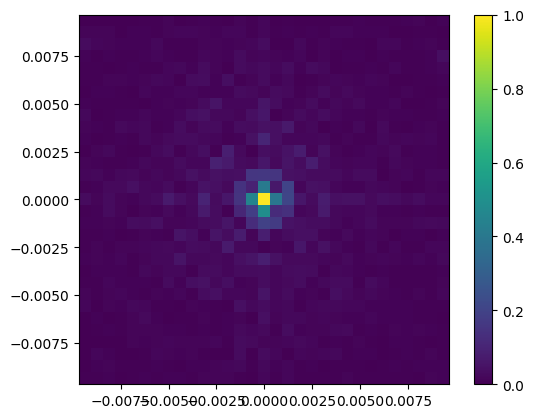

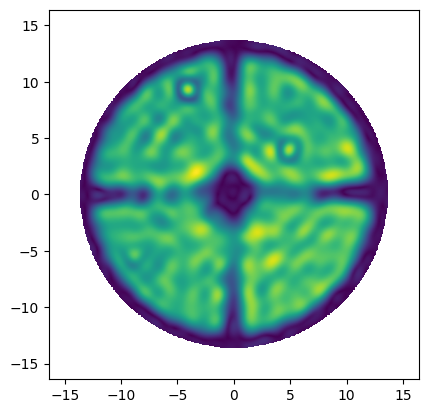

<xarray.Dataset>
Dimensions:        (time-centroid: 1, chan: 1, pol: 4, u_prime: 442,
                    v_prime: 442, u: 529, v: 529, l: 31, m: 31, ddi: 1,
                    time_centroid: 1)
Coordinates:
  * chan           (chan) float64 1.417e+10
  * ddi            (ddi) <U5 'ddi_0'
  * l              (l) float64 0.009663 0.009019 ... -0.009019 -0.009663
  * m              (m) float64 -0.009663 -0.009019 ... 0.009019 0.009663
  * pol            (pol) int64 0 1 2 3
  * time_centroid  (time_centroid) float64 5.17e+09
  * u              (u) float64 774.7 771.8 768.8 765.9 ... -768.8 -771.8 -774.7
  * u_prime        (u_prime) float64 648.5 645.6 642.6 ... -639.7 -642.6 -645.6
  * v              (v) float64 -774.7 -771.8 -768.8 -765.9 ... 768.8 771.8 774.7
  * v_prime        (v_prime) float64 -648.5 -645.6 -642.6 ... 639.7 642.6 645.6
Dimensions without coordinates: time-centroid
Data variables:
    AMPLITUDE      (time-centroid, chan, pol, u_prime, v_prime) float64 dask.array<chunksize=(1, 1, 1, 221, 221), meta=np.ndarray>
    ANGLE          (time-centroid, chan, pol, u_prime, v_prime) float64 dask.array<chunksize=(1, 1, 1, 221, 221), meta=np.ndarray>
    APERTURE       (time-centroid, chan, pol, u, v) complex128 dask.array<chunksize=(1, 1, 1, 133, 265), meta=np.ndarray>
    BEAM           (time-centroid, chan, pol, l, m) complex128 dask.array<chunksize=(1, 1, 4, 31, 31), meta=np.ndarray>
Attributes:
    ant_id:          ant_23
    ant_name:        ea25
    telescope_name:  EVLA
    time_centroid:   [5170359444.5]

In [7]:
import xarray as xr
#%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import constants
import matplotlib.patches as patches

beforeimage = resultsfolder+'/before.image.zarr'
afterimage = resultsfolder+'/after.image.zarr'

plt.close('all')

chan = 0

ds = xr.open_zarr(afterimage+'/ant_23/ddi_0')
wavelength = scipy.constants.speed_of_light/ds.chan.values[chan]
l = ds.l.values
m = ds.m.values
u = ds.u.values*wavelength
v = ds.v.values*wavelength

print(u.min(),u.max())

plt.figure()
plt.imshow(np.abs(ds.BEAM[0,chan,0,:,:]),extent=[l.min(), l.max(), m.min(), m.max()])
plt.colorbar()
plt.show()

circle = patches.Circle((0,0), 12.5, fill=False, color='white', alpha=0.7, linewidth=2)

fig, ax =plt.subplots()
plt.imshow(np.abs(ds.APERTURE[0,chan,0,:,:]),extent=[u.min(), u.max(), v.min(), v.max()])
#ax.add_patch(circle)
plt.show()

ds

In [8]:
from astrohack.panel import panel
panel_model = 'rigid'

panel(
    image_name=beforeimage, 
    panel_model=panel_model,
    unit='mils', 
    parallel=True,
    overwrite=True
)
panel(
    image_name=afterimage, 
    panel_model=panel_model,
    unit='mils', 
    parallel=True,
    overwrite=True
)

2023-04-10 12:07:26,799 - INFO     - astrohack - (_check_parms.py:115) - Setting default panel_name to ./results/before.panel.zarr
2023-04-10 12:07:26,801 - INFO     - astrohack - (_check_parms.py:115) - Setting default sel_ddi to all
2023-04-10 12:07:26,802 - WARNING  - astrohack - (_io.py:42) - ./results/before.panel.zarr will be overwritten.
2023-04-10 12:07:26,803 - INFO     - astrohack - (panel.py:111) - Processing ddi_0 for ant_23
2023-04-10 12:07:30,889 - INFO     - astrohack - (panel.py:124) - Panel finished processing
2023-04-10 12:07:30,890 - INFO     - astrohack - (_check_parms.py:115) - Setting default panel_name to ./results/after.panel.zarr
2023-04-10 12:07:30,891 - INFO     - astrohack - (_check_parms.py:115) - Setting default sel_ddi to all
2023-04-10 12:07:30,892 - WARNING  - astrohack - (_io.py:42) - ./results/after.panel.zarr will be overwritten.
2023-04-10 12:07:30,894 - INFO     - astrohack - (panel.py:111) - Processing ddi_0 for ant_23
2023-04-10 12:07:34,840 - IN

In [14]:
import numpy as np
beforepanel = resultsfolder+'/before.panel.zarr'
afterpanel = resultsfolder+'/after.panel.zarr'

panellist = ['3- 4', '5-27', '5-37', '5-38']
expected  = np.array([-100, 75, 0, 150])

ref_means = np.array([-112.28, 73.3025, -1.4, 139.125 ])
ref_perce = (ref_means-expected)/expected*100.

def extract_panel_data(name, panellist):
    fname = name+'/ant_23/screws.txt'
    data = open(fname, 'r')
    panels = []
    for line in data:
        wrds = line.split('  ')
        if wrds[0] in panellist:
            nmbrs = line.split()
            panel = [0, 0, 0, 0]
            for i in range(4):
                panel[-1-i] = float(nmbrs[-1-i])
            panels.append(panel)
    return np.array(panels)
    
def compare_before_after(panellist, expected): 
    after = extract_panel_data(afterpanel, panellist)
    before = extract_panel_data(beforepanel, panellist)
    diffs = after-before
    means = np.mean(diffs, axis=1)
    percent = (means-expected)/expected*100.
    return means, percent

def test_improvement(pname, diff, unit):
    abso = np.abs(diff)
    if abso > 1e-15:
        if diff < 0:
            print('Panel {0:s} has improved by {1:.2f} {2:s}'.format(pname, abso, unit))
        else:
            print('Panel {0:s} is worse by {1:.2f} {2:s}'.format(pname, abso, unit))
    else:
        print('Panel {0:s} is unchanged'.format(pname))

def is_it_an_improvement(means, percent):
    sumcomp = np.sum(ref_means-means)
    if abs(sumcomp) < 1e-15:
        print('No changes!')
    else:
        print('Results have changed')
        for i in range(4):
            pname = panellist[i]
            if expected[i] == 0:
                diff = means[i]-ref_means[i]
                test_improvement(pname, diff, 'mils')
            else:
                diff = np.abs(percent[i]) - np.abs(ref_perce[i])
                test_improvement(pname, diff, '%')
    
means, percent = compare_before_after(panellist, expected)
is_it_an_improvement(means, percent)

/tmp/ipykernel_11953/1324979271.py:9: RuntimeWarning: divide by zero encountered in true_divide
  ref_perce = (ref_means-expected)/expected*100.


ValueError: operands could not be broadcast together with shapes (3,) (4,) 